# Machine Learning Foundation

## Section 2, Part d:  Regularization and Gradient Descent


## Introduction

We will begin with a short tutorial on regression, polynomial features, and regularization based on a very simple, sparse data set that contains a column of `x` data and associated `y` noisy data. The data file is called `X_Y_Sinusoid_Data.csv`.


## Question 1

*   Import the data.

*   Also generate approximately 100 equally spaced x data points over the range of 0 to 1. Using these points, calculate the y-data which represents the "ground truth" (the real function) from the equation: $y = sin(2\pi x)$

*   Plot the sparse data (`x` vs `y`) and the calculated ("real") data.


In [63]:
!pip install pandas
!pip install scikit-learn
!pip install seaborn
!pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\Lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\Lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\Lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\Lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [64]:
# Surpress warnings from using older version of sklearn:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [65]:
import pandas as pd
import numpy as np


data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/labs/data/X_Y_Sinusoid_Data.csv")
data.head()

X_real = np.linspace(0, 1.0, 100)
Y_real = np.sin(2 * np.pi * X_real)

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

[Text(0.5, 0, 'x data'), Text(0, 0.5, 'y data')]

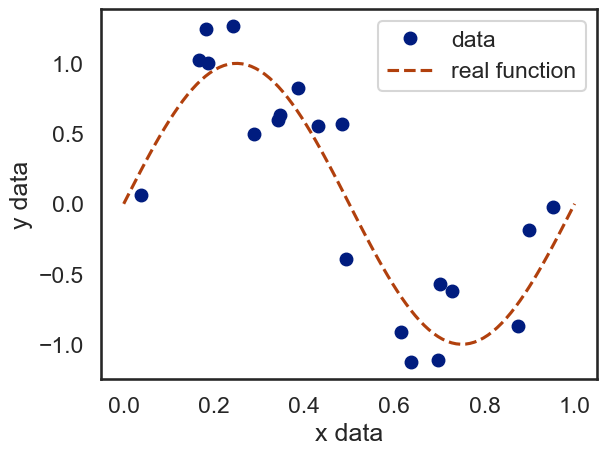

In [67]:
# Cài đặt style, context và palette cho seaborn
sns.set_style('white')    # Kiểu nền trắng
sns.set_context('talk')   # Font chữ và kích thước phù hợp cho trình chiếu
sns.set_palette('dark')   # Bảng màu tối

# Vẽ dữ liệu noisy/sparse
ax = data.set_index('x')['y'].plot(ls='', marker='o', label='data')  # Chỉ vẽ các điểm dữ liệu

# Vẽ hàm thực (real function) dưới dạng đường nét đứt
ax.plot(X_real, Y_real, ls='--', marker='', label='real function')

# Thêm chú thích và nhãn trục
ax.legend()
ax.set(xlabel='x data', ylabel='y data')


## Question 2

*   Using the `PolynomialFeatures` class from Scikit-learn's preprocessing library, create 20th order polynomial features.
*   Fit this data using linear regression.
*   Plot the resulting predicted value compared to the calculated data.

Note that `PolynomialFeatures` requires either a dataframe (with one column, not a Series) or a 2D array of dimension (`X`, 1), where `X` is the length.


[Text(0.5, 0, 'x data'), Text(0, 0.5, 'y data')]

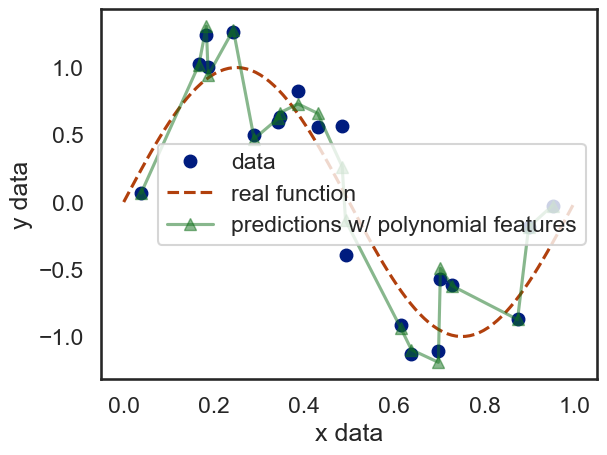

In [68]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Thiết lập PolynomialFeatures với bậc 20
degree = 20
pf = PolynomialFeatures(degree)
lr = LinearRegression()

# Lấy dữ liệu X và Y từ DataFrame
X_data = data[['x']]
Y_data = data['y']

# Sinh các đặc trưng đa thức và huấn luyện mô hình
X_poly = pf.fit_transform(X_data)
lr = lr.fit(X_poly, Y_data)
Y_pred = lr.predict(X_poly)

# Vẽ biểu đồ:
plt.plot(X_data, Y_data, marker='o', ls='', label='data', alpha=1)          # Dữ liệu noisy
plt.plot(X_real, Y_real, ls='--', label='real function')                     # Hàm thực
plt.plot(X_data, Y_pred, marker='^', alpha=.5, label='predictions w/ polynomial features')  # Dự đoán
plt.legend()
ax = plt.gca()
ax.set(xlabel='x data', ylabel='y data')


## Question 3

*   Perform the regression on using the data with polynomial features using ridge regression ($\alpha$=0.001) and lasso regression ($\alpha$=0.0001).
*   Plot the results, as was done in Question 1.
*   Also plot the magnitude of the coefficients obtained from these regressions, and compare them to those obtained from linear regression in the previous question. The linear regression coefficients will likely need a separate plot (or their own y-axis) due to their large magnitude.

What does the comparatively large magnitude of the data tell you about the role of regularization?


[Text(0.5, 0, 'x data'), Text(0, 0.5, 'y data')]

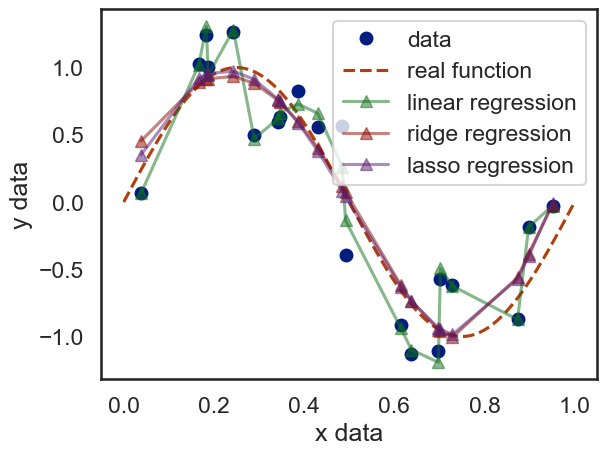

In [69]:
# Tắt cảnh báo của sklearn liên quan đến regularization
import warnings
warnings.filterwarnings('ignore', module='sklearn')

from sklearn.linear_model import Ridge, Lasso

# Ridge Regression với alpha=0.001
rr = Ridge(alpha=0.001)
rr = rr.fit(X_poly, Y_data)
Y_pred_rr = rr.predict(X_poly)

# Lasso Regression với alpha=0.0001
lassor = Lasso(alpha=0.0001)
lassor = lassor.fit(X_poly, Y_data)
Y_pred_lr = lassor.predict(X_poly)

# Vẽ biểu đồ so sánh dữ liệu gốc, hàm thực và các dự đoán
plt.plot(X_data, Y_data, marker='o', ls='', label='data')                  # Dữ liệu noisy
plt.plot(X_real, Y_real, ls='--', label='real function')                   # Hàm thực
plt.plot(X_data, Y_pred, label='linear regression', marker='^', alpha=.5)  # Hồi quy tuyến tính đa thức
plt.plot(X_data, Y_pred_rr, label='ridge regression', marker='^', alpha=.5) # Ridge Regression
plt.plot(X_data, Y_pred_lr, label='lasso regression', marker='^', alpha=.5) # Lasso Regression

plt.legend()
ax = plt.gca()
ax.set(xlabel='x data', ylabel='y data')


In [70]:
# Tạo DataFrame chứa hệ số của từng mô hình
coefficients = pd.DataFrame()
coefficients['linear regression'] = lr.coef_.ravel()      # Hệ số Linear Regression
coefficients['ridge regression'] = rr.coef_.ravel()       # Hệ số Ridge Regression
coefficients['lasso regression'] = lassor.coef_.ravel()   # Hệ số Lasso Regression

# Lấy giá trị tuyệt đối để so sánh quy mô
coefficients = coefficients.applymap(abs)

# Thống kê cơ bản các hệ số: min, max, mean, std,... 
# Nhìn thấy sự khác biệt lớn giữa hồi quy không điều chuẩn và hồi quy có điều chuẩn
coefficients.describe()


,linear regression,ridge regression,lasso regression
count,2.100000e+01,21.000000,21.000000
mean,2.428000e+11,2.169397,2.167284
std,2.710001e+11,2.900278,4.706731
min,1.866886e+06,0.000000,0.000000
25%,3.076175e+10,0.467578,0.000000
50%,1.258341e+11,1.017272,0.252181
75%,3.631186e+11,2.883507,1.641353
max,9.201333e+11,12.429635,20.176708


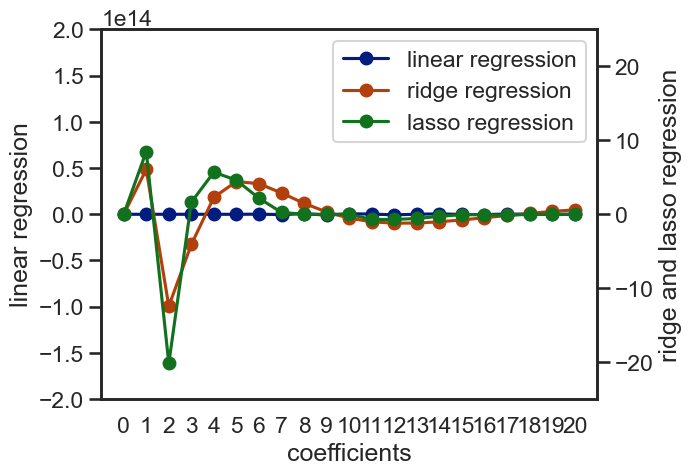

In [71]:
# Lấy bảng màu seaborn
colors = sns.color_palette()

# Tạo trục chính và trục phụ
ax1 = plt.axes()
ax2 = ax1.twinx()  # Trục Y phụ để vẽ các hệ số của mô hình điều chuẩn

# Vẽ hệ số Linear Regression trên trục chính
ax1.plot(lr.coef_.ravel(), color=colors[0], marker='o', label='linear regression')

# Vẽ hệ số Ridge và Lasso trên trục phụ
ax2.plot(rr.coef_.ravel(), color=colors[1], marker='o', label='ridge regression')
ax2.plot(lassor.coef_.ravel(), color=colors[2], marker='o', label='lasso regression')

# Thiết lập giới hạn trục Y để hiển thị tốt
ax1.set_ylim(-2e14, 2e14)  # Linear Regression (không điều chuẩn)
ax2.set_ylim(-25, 25)      # Ridge & Lasso (có điều chuẩn)

# Kết hợp legend từ cả 2 trục
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2)

# Nhãn trục
ax1.set(xlabel='coefficients', ylabel='linear regression')
ax2.set(ylabel='ridge and lasso regression')

# Hiển thị các tick trên trục X theo số lượng hệ số
ax1.set_xticks(range(len(lr.coef_)))


## Question 4

For the remaining questions, we will be working with the [data set](https://www.kaggle.com/c/house-prices-advanced-regression-techniques?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01) from last lesson, which is based on housing prices in Ames, Iowa. There are an extensive number of features--see the exercises from week three for a discussion of these features.

To begin:

*   Import the data with Pandas, remove any null values, and one hot encode categoricals. Either Scikit-learn's feature encoders or Pandas `get_dummies` method can be used.
*   Split the data into train and test sets.
*   Log transform skewed features.
*   Scaling can be attempted, although it can be interesting to see how well regularization works without scaling features.


In [72]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/labs/data/Ames_Housing_Sales.csv")
data.head(10)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,NaN,3,1Fam,TA,No,706.0,0.0,...,0.0,Pave,8,856.0,AllPub,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,0.0,Pave,6,1262.0,AllPub,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,0.0,Pave,6,920.0,AllPub,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,NaN,3,1Fam,Gd,No,216.0,0.0,...,0.0,Pave,7,756.0,AllPub,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,NaN,4,1Fam,TA,Av,655.0,0.0,...,0.0,Pave,9,1145.0,AllPub,192.0,2000,2000,2008,250000.0
5,796.0,566.0,320.0,NaN,1,1Fam,TA,No,732.0,0.0,...,0.0,Pave,5,796.0,AllPub,40.0,1993,1995,2009,143000.0
6,1694.0,0.0,0.0,NaN,3,1Fam,TA,Av,1369.0,0.0,...,0.0,Pave,7,1686.0,AllPub,255.0,2004,2005,2007,307000.0
7,1107.0,983.0,0.0,NaN,3,1Fam,TA,Mn,859.0,32.0,...,0.0,Pave,7,1107.0,AllPub,235.0,1973,1973,2009,200000.0
8,1022.0,752.0,0.0,NaN,2,1Fam,NaN,NaN,0.0,0.0,...,0.0,Pave,8,952.0,AllPub,90.0,1931,1950,2008,129900.0
9,1077.0,0.0,0.0,NaN,2,2fmCon,TA,No,851.0,0.0,...,0.0,Pave,5,991.0,AllPub,0.0,1939,1950,2008,118000.0


Create a list of categorial data and one-hot encode. Pandas one-hot encoder (`get_dummies`) works well with data that is defined as a categorical.


In [73]:
data =pd.get_dummies(data, drop_first=True)
data.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch',
       ...
       'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI',
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'Street_Pave', 'Utilities_NoSeWa'],
      dtype='object', length=241)

Next, split the data in train and test data sets.


In [74]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3, random_state=42)

There are a number of columns that have skewed features--a log transformation can be applied to them. Note that this includes the `SalePrice`, our predictor. However, let's keep that one as is.


In [75]:
# Create a list of float colums to check for skewing
mask = data.dtypes == float
float_cols = data.columns[mask]

In [76]:
# Giới hạn độ lệch (skewness) cần quan tâm
skew_limit = 0.75

# Tính skewness cho các cột float trong tập train
skew_vals = train[float_cols].skew()

# Chọn các cột có độ lệch vượt quá giới hạn
skew_cols = (
    skew_vals
    .sort_values(ascending=False)      # Sắp xếp từ cao xuống thấp
    .to_frame()                         # Chuyển Series sang DataFrame
    .rename(columns={0: 'Skew'})       # Đổi tên cột
    .query('abs(Skew) > {0}'.format(skew_limit))  # Chỉ giữ cột có |Skew| > 0.75
)

# Hiển thị các cột có độ lệch lớn
skew_cols


,Skew
MiscVal,26.915364
PoolArea,15.777668
LotArea,11.501694
LowQualFinSF,11.210638
3SsnPorch,10.150612
ScreenPorch,4.599803
BsmtFinSF2,4.466378
EnclosedPorch,3.218303
LotFrontage,3.138032
MasVnrArea,2.492814


Transform all the columns where the skew is greater than 0.75, excluding "SalePrice".


Text(0.5, 0.98, 'Field "BsmtFinSF1"')

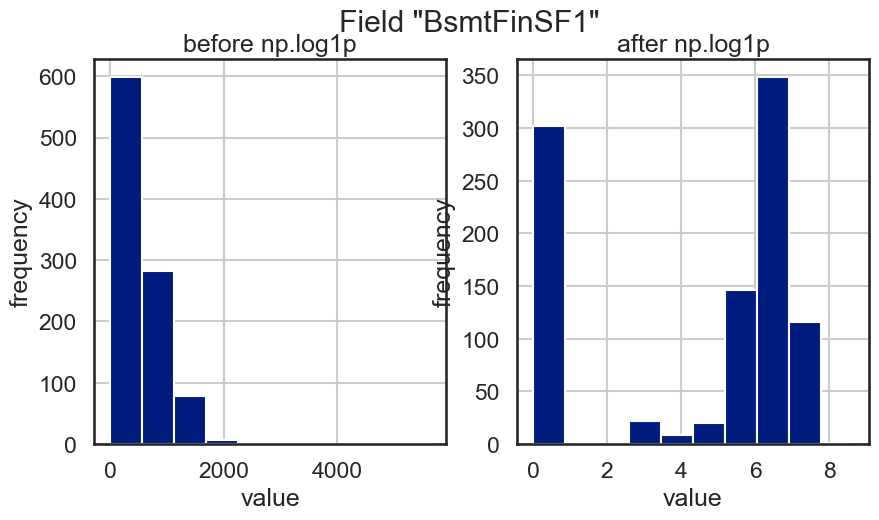

In [77]:
# Hiển thị tác động của log1p lên một feature có độ lệch cao
field = "BsmtFinSF1"

# Tạo 2 subplot: trước và sau khi log1p
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))

# Biểu đồ histogram gốc
train[field].hist(ax=ax_before)

# Biểu đồ histogram sau khi áp dụng np.log1p (log(1 + x))
train[field].apply(np.log1p).hist(ax=ax_after)

# Gắn nhãn và tiêu đề cho từng subplot
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')

# Tiêu đề chung cho figure
fig.suptitle('Field "{}"'.format(field))


In [78]:
# Tắt cảnh báo "SettingWithCopyWarning" của pandas
pd.options.mode.chained_assignment = None

# Áp dụng log1p (log(1+x)) cho các cột có độ lệch cao
for col in skew_cols.index.tolist():
    if col == "SalePrice":  # Bỏ qua cột mục tiêu
        continue
    train[col] = np.log1p(train[col])        # Chuyển đổi dữ liệu train
    test[col]  = test[col].apply(np.log1p)   # Chuyển đổi dữ liệu test tương ứng


Separate features from predictor.


In [79]:
# Chọn tất cả các cột ngoại trừ 'SalePrice' làm features
feature_cols = [x for x in train.columns if x != 'SalePrice']

# Tách dữ liệu huấn luyện
X_train = train[feature_cols]
y_train = train['SalePrice']

# Tách dữ liệu kiểm tra
X_test = test[feature_cols]
y_test = test['SalePrice']


## Question 5

*   Write a function **`rmse`** that takes in truth and prediction values and returns the root-mean-squared error. Use sklearn's `mean_squared_error`.


In [80]:
from sklearn.metrics import mean_squared_error

# Hàm tính Root Mean Squared Error (RMSE)
def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))


*   Fit a basic linear regression model
*   print the root-mean-squared error for this model
*   plot the predicted vs actual sale price based on the model.


In [81]:
from sklearn.linear_model import LinearRegression

# Huấn luyện mô hình Linear Regression trên tập train
linearRegression = LinearRegression().fit(X_train, y_train)

# Dự đoán trên tập test và tính RMSE
linearRegression_rmse = rmse(y_test, linearRegression.predict(X_test))

# Hiển thị kết quả RMSE
print(linearRegression_rmse)


42033.492152799496


[Text(0.5, 0, 'Actual Price'),
 Text(0, 0.5, 'Predicted Price'),
 (0.0, 582933.0),
 (0.0, 582933.0),
 Text(0.5, 1.0, 'Linear Regression Results')]

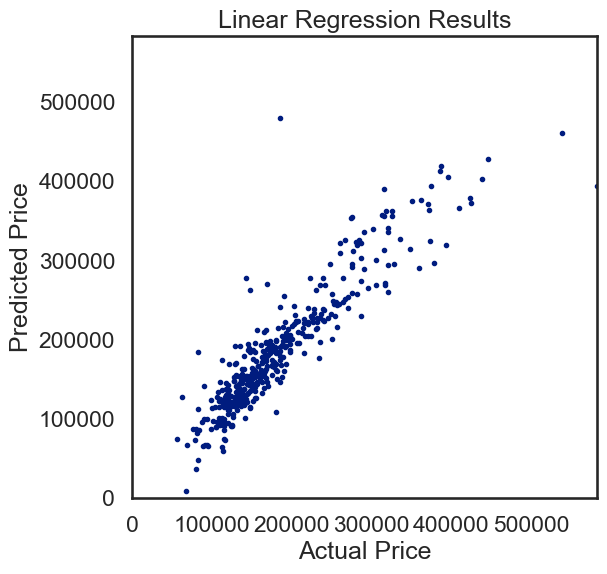

In [82]:
# Vẽ scatter plot so sánh giá thực tế và giá dự đoán của Linear Regression
f = plt.figure(figsize=(6,6))
ax = plt.axes()

# Các điểm dự đoán
ax.plot(y_test, linearRegression.predict(X_test), 
         marker='o', ls='', ms=3.0)

# Giới hạn trục X và Y từ 0 đến giá trị max của y_test
lim = (0, y_test.max())

# Gắn nhãn, tiêu đề và giới hạn trục
ax.set(
    xlabel='Actual Price', 
    ylabel='Predicted Price', 
    xlim=lim,
    ylim=lim,
    title='Linear Regression Results'
)


## Question 6

Ridge regression uses L2 normalization to reduce the magnitude of the coefficients. This can be helpful in situations where there is high variance. The regularization functions in Scikit-learn each contain versions that have cross-validation built in.

*   Fit a regular (non-cross validated) Ridge model to a range of $\alpha$ values and plot the RMSE using the cross validated error function you created above.
*   Use $$[0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]$$ as the range of alphas.
*   Then repeat the fitting of the Ridge models using the range of $\alpha$ values from the prior section. Compare the results.


Now for the `RidgeCV` method. It's not possible to get the alpha values for the models that weren't selected, unfortunately. The resulting error values and $\alpha$ values are very similar to those obtained above.


In [83]:
from sklearn.linear_model import RidgeCV

# Danh sách alpha thử nghiệm cho Ridge Regression
alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

# RidgeCV: tự động chọn alpha tốt nhất qua cross-validation (cv=4)
ridgeCV = RidgeCV(alphas=alphas, cv=4).fit(X_train, y_train)

# Dự đoán trên tập test và tính RMSE
ridgeCV_rmse = rmse(y_test, ridgeCV.predict(X_test))

# In alpha tốt nhất và RMSE trên tập test
print(ridgeCV.alpha_, ridgeCV_rmse)


10.0 32022.031469901143


## Question 7

Much like the `RidgeCV` function, there is also a `LassoCV` function that uses an L1 regularization function and cross-validation. L1 regularization will selectively shrink some coefficients, effectively performing feature elimination.

The `LassoCV` function does not allow the scoring function to be set. However, the custom error function (`rmse`) created above can be used to evaluate the error on the final model.

Similarly, there is also an elastic net function with cross validation, `ElasticNetCV`, which is a combination of L2 and L1 regularization.

*   Fit a Lasso model using cross validation and determine the optimum value for $\alpha$ and the RMSE using the function created above. Note that the magnitude of $\alpha$ may be different from the Ridge model.
*   Repeat this with the Elastic net model.
*   Compare the results via table and/or plot.

Use the following alphas:\
`[1e-5, 5e-5, 0.0001, 0.0005]`


In [84]:
from sklearn.linear_model import LassoCV
import numpy as np

# Các giá trị alpha thử nghiệm cho Lasso
alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005])

# LassoCV: tự động chọn alpha tốt nhất qua cross-validation (cv=3)
# max_iter=50,000 để đảm bảo hội tụ
lassoCV = LassoCV(alphas=alphas2, max_iter=int(5e4), cv=3).fit(X_train, y_train)

# Dự đoán trên tập test và tính RMSE
lassoCV_rmse = rmse(y_test, lassoCV.predict(X_test))

# In alpha tốt nhất và RMSE trên tập test
print(lassoCV.alpha_, lassoCV_rmse)  # Lasso thường chạy chậm hơn Ridge


0.0005 46069.63857009786


We can determine how many of these features remain non-zero.


In [85]:
# Hiển thị số lượng hệ số không bằng 0 sau khi dùng Lasso
print('Of {} coefficients, {} are non-zero with Lasso.'.format(
    len(lassoCV.coef_),               # Tổng số hệ số
    len(lassoCV.coef_.nonzero()[0])   # Số hệ số khác 0
))


Of 240 coefficients, 230 are non-zero with Lasso.


Now try the elastic net, with the same alphas as in Lasso, and l1\_ratios between 0.1 and 0.9


In [86]:
from sklearn.linear_model import ElasticNetCV
import numpy as np

# Tỷ lệ l1 thử nghiệm cho ElasticNet
l1_ratios = np.linspace(0.1, 0.9, 9)

# ElasticNetCV: kết hợp Lasso (L1) và Ridge (L2) với cross-validation
elasticNetCV = ElasticNetCV(
    alphas=alphas2, 
    l1_ratio=l1_ratios,
    max_iter=int(1e4)
).fit(X_train, y_train)

# Dự đoán trên tập test và tính RMSE
elasticNetCV_rmse = rmse(y_test, elasticNetCV.predict(X_test))

# In alpha, l1_ratio tốt nhất và RMSE trên tập test
print(elasticNetCV.alpha_, elasticNetCV.l1_ratio_, elasticNetCV_rmse)


0.0005 0.1 36040.658584633806


Comparing the RMSE calculation from all models is easiest in a table.


In [87]:
# Tạo danh sách RMSE của từng mô hình
rmse_vals = [linearRegression_rmse, ridgeCV_rmse, lassoCV_rmse, elasticNetCV_rmse]
labels = ['Linear', 'Ridge', 'Lasso', 'ElasticNet']

# Chuyển sang DataFrame để hiển thị
rmse_df = pd.Series(rmse_vals, index=labels).to_frame()

# Đổi tên cột thành 'RMSE'
rmse_df.rename(columns={0: 'RMSE'}, inplace=True)

# Hiển thị bảng RMSE
rmse_df


,RMSE
Linear,42033.492153
Ridge,32022.031470
Lasso,46069.638570
ElasticNet,36040.658585


We can also make a plot of actual vs predicted housing prices as before.


[Text(0.5, 0, 'Actual Price'),
 Text(0, 0.5, 'Predicted Price'),
 Text(0.5, 1.0, 'Linear Regression Results')]

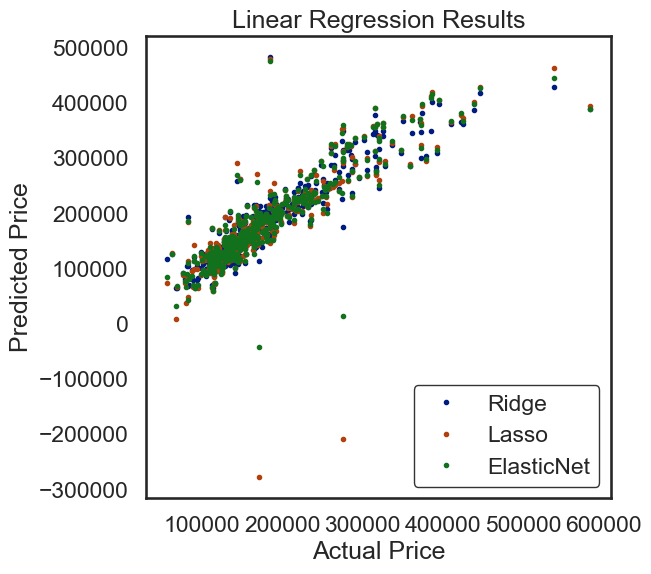

In [88]:
# Tạo figure và trục vẽ
f = plt.figure(figsize=(6,6))
ax = plt.axes()

# Nhãn và mô hình để so sánh
labels = ['Ridge', 'Lasso', 'ElasticNet']
models = [ridgeCV, lassoCV, elasticNetCV]

# Vẽ scatter plot: giá thực tế vs giá dự đoán của từng mô hình
for mod, lab in zip(models, labels):
    ax.plot(y_test, mod.predict(X_test), 
             marker='o', ls='', ms=3.0, label=lab)

# Tùy chỉnh legend: khung màu đen và đường viền 1.0
leg = plt.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

# Nhãn trục và tiêu đề
ax.set(
    xlabel='Actual Price', 
    ylabel='Predicted Price', 
    title='Linear Regression Results'
)


## Question 8

Let's explore Stochastic gradient descent in this exercise.\
Recall that Linear models in general are sensitive to scaling.
However, SGD is *very* sensitive to scaling.\
Moreover, a high value of learning rate can cause the algorithm to diverge, whereas a too low value may take too long to converge.

*   Fit a stochastic gradient descent model without a regularization penalty (the relevant parameter is `penalty`).
*   Now fit stochastic gradient descent models with each of the three penalties (L2, L1, Elastic Net) using the parameter values determined by cross validation above.
*   Do not scale the data before fitting the model.
*   Compare the results to those obtained without using stochastic gradient descent.


In [89]:
from sklearn.linear_model import SGDRegressor

# Chuẩn bị dictionary các tham số cho từng mô hình
model_parameters_dict = {
    'Linear': {'penalty': None},  # Hồi quy tuyến tính thuần túy
    'Lasso': {'penalty': 'l2', 'alpha': lassoCV.alpha_},  # Lasso (L1) qua SGD
    'Ridge': {'penalty': 'l1', 'alpha': ridgeCV_rmse},    # Ridge (L2) qua SGD
    'ElasticNet': {
        'penalty': 'elasticnet', 
        'alpha': elasticNetCV.alpha_,
        'l1_ratio': elasticNetCV.l1_ratio_
    }  # ElasticNet qua SGD
}

# Dictionary lưu RMSE của từng mô hình SGD
new_rmses = {}

# Lặp qua các mô hình và tham số
for modellabel, parameters in model_parameters_dict.items():
    # Tạo mô hình SGDRegressor với tham số từ dict
    SGD = SGDRegressor(**parameters)
    
    # Huấn luyện trên tập train
    SGD.fit(X_train, y_train)
    
    # Tính RMSE trên tập test
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test))

# Thêm cột RMSE-SGD vào DataFrame ban đầu
rmse_df['RMSE-SGD'] = pd.Series(new_rmses)

# Hiển thị bảng kết quả
rmse_df


,RMSE,RMSE-SGD
Linear,42033.492153,6.494456e+15
Ridge,32022.031470,1.211558e+16
Lasso,46069.638570,1.420486e+15
ElasticNet,36040.658585,1.484436e+15


Notice how high the error values are! The algorithm is diverging. This can be due to scaling and/or learning rate being too high. Let's adjust the learning rate and see what happens.

*   Pass in `eta0=1e-7` when creating the instance of `SGDClassifier`.
*   Re-compute the errors for all the penalties and compare.


In [90]:
from sklearn.linear_model import SGDRegressor

# Chuẩn bị dictionary các tham số cho từng mô hình SGD
model_parameters_dict = {
    'Linear': {'penalty': None},                        # Hồi quy tuyến tính thuần túy
    'Lasso': {'penalty': 'l2', 'alpha': lassoCV.alpha_},   # Lasso qua SGD
    'Ridge': {'penalty': 'l1', 'alpha': ridgeCV_rmse},     # Ridge qua SGD
    'ElasticNet': {                                        # ElasticNet qua SGD
        'penalty': 'elasticnet', 
        'alpha': elasticNetCV.alpha_,
        'l1_ratio': elasticNetCV.l1_ratio_
    }
}

# Dictionary lưu RMSE của từng mô hình SGD với learning rate nhỏ
new_rmses = {}

# Lặp qua các mô hình và tham số
for modellabel, parameters in model_parameters_dict.items():
    # Khởi tạo SGDRegressor với learning rate rất nhỏ (eta0=1e-7)
    SGD = SGDRegressor(eta0=1e-7, **parameters)
    
    # Huấn luyện mô hình trên tập train
    SGD.fit(X_train, y_train)
    
    # Tính RMSE trên tập test
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test))

# Thêm cột RMSE mới vào DataFrame ban đầu
rmse_df['RMSE-SGD-learningrate'] = pd.Series(new_rmses)

# Hiển thị bảng kết quả
rmse_df


,RMSE,RMSE-SGD,RMSE-SGD-learningrate
Linear,42033.492153,6.494456e+15,81822.736356
Ridge,32022.031470,1.211558e+16,76130.774104
Lasso,46069.638570,1.420486e+15,73789.173043
ElasticNet,36040.658585,1.484436e+15,80234.012441


Now let's scale our training data and try again.

*   Fit a `MinMaxScaler` to `X_train` create a variable `X_train_scaled`.
*   Using the scaler, transform `X_test` and create a variable `X_test_scaled`.
*   Apply the same versions of SGD to them and compare the results. Don't pass in a eta0 this time.


In [91]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDRegressor

# Chuẩn hóa dữ liệu về khoảng [0, 1]
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionary lưu RMSE của từng mô hình SGD trên dữ liệu đã scale
new_rmses = {}

# Lặp qua các mô hình và tham số
for modellabel, parameters in model_parameters_dict.items():
    # Khởi tạo SGDRegressor với tham số từ dict
    SGD = SGDRegressor(**parameters)
    
    # Huấn luyện trên dữ liệu đã chuẩn hóa
    SGD.fit(X_train_scaled, y_train)
    
    # Tính RMSE trên tập test
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test_scaled))

# Thêm cột RMSE mới vào DataFrame
rmse_df['RMSE-SGD-scaled'] = pd.Series(new_rmses)

# Hiển thị bảng kết quả
rmse_df


,RMSE,RMSE-SGD,RMSE-SGD-learningrate,RMSE-SGD-scaled
Linear,42033.492153,6.494456e+15,81822.736356,32545.461958
Ridge,32022.031470,1.211558e+16,76130.774104,77751.166542
Lasso,46069.638570,1.420486e+15,73789.173043,32208.146732
ElasticNet,36040.658585,1.484436e+15,80234.012441,32174.880047


In [92]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDRegressor

# Chuẩn hóa dữ liệu về khoảng [0,1] bằng MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionary lưu RMSE cho từng mô hình SGD
new_rmses = {}

# Lặp qua các mô hình và tham số
for modellabel, parameters in model_parameters_dict.items():
    # Khởi tạo SGDRegressor với tham số từ dictionary
    SGD = SGDRegressor(**parameters)
    
    # Huấn luyện mô hình trên dữ liệu đã chuẩn hóa
    SGD.fit(X_train_scaled, y_train)
    
    # Tính RMSE trên tập test
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test_scaled))

# Thêm cột RMSE mới vào DataFrame ban đầu
rmse_df['RMSE-SGD-scaled'] = pd.Series(new_rmses)

# Hiển thị bảng kết quả
rmse_df


,RMSE,RMSE-SGD,RMSE-SGD-learningrate,RMSE-SGD-scaled
Linear,42033.492153,6.494456e+15,81822.736356,32422.102884
Ridge,32022.031470,1.211558e+16,76130.774104,77768.788760
Lasso,46069.638570,1.420486e+15,73789.173043,32231.902468
ElasticNet,36040.658585,1.484436e+15,80234.012441,32690.144139


***

### Machine Learning Foundation (C) 2020 IBM Corporation
